### Download LJSpeech dataset from https://keithito.com/LJ-Speech-Dataset/ and extract into ../data/

In [1]:
%load_ext autoreload
%autoreload 2

from importlib import reload
from DataLoader import LJSpeechDataset, collate_fn
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import utils
from IPython.display import Audio


2026-02-27 16:42:09,386 - INFO - Loading dataset from ..\data\LJSpeech-1.1\wavs...


Number of samples in the dataset: 13100
Sample text: PRINTING, IN THE ONLY SENSE WITH WHICH WE ARE AT PRESENT CONCERNED, DIFFERS FROM MOST IF NOT FROM ALL THE ARTS AND CRAFTS REPRESENTED IN THE EXHIBITION
Sample audio shape: (212893,)


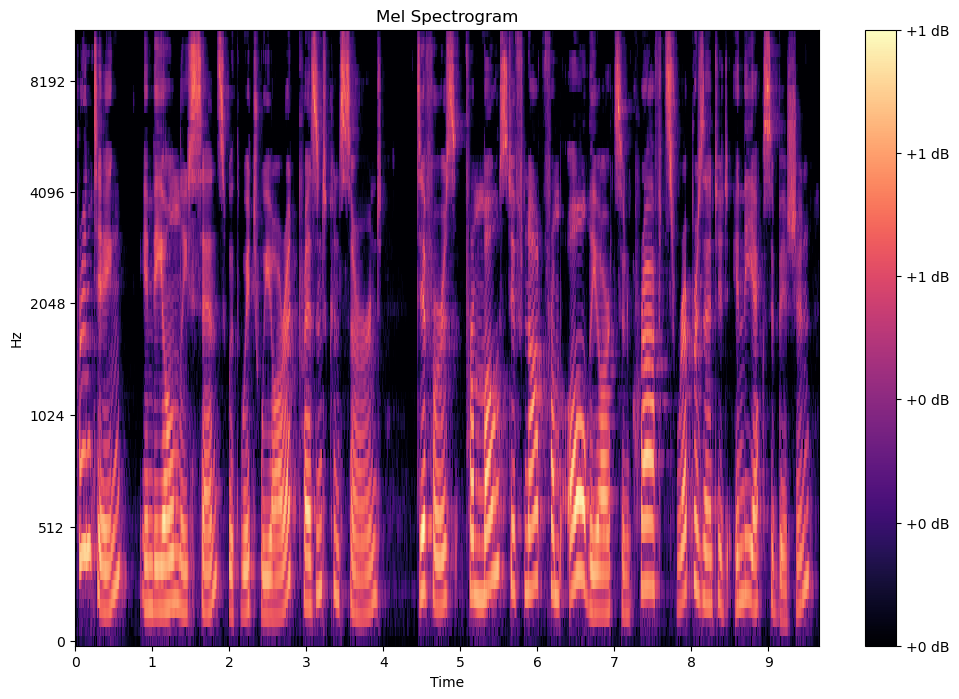

Raw text: PRINTING, IN THE ONLY SENSE WITH WHICH WE ARE AT PRESENT CONCERNED, DIFFERS FROM MOST IF NOT FROM ALL THE ARTS AND CRAFTS REPRESENTED IN THE EXHIBITION
Tokenized text: tensor([23, 13, 10,  9,  6, 10,  9, 21,  3,  4, 10,  9,  4,  6, 11,  5,  4,  8,
         9, 15, 22,  4, 12,  5,  9, 12,  5,  4, 18, 10,  6, 11,  4, 18, 11, 10,
        19, 11,  4, 18,  5,  4,  7, 13,  5,  4,  7,  6,  4, 23, 13,  5, 12,  5,
         9,  6,  4, 19,  8,  9, 19,  5, 13,  9,  5, 14,  3,  4, 14, 10, 20, 20,
         5, 13, 12,  4, 20, 13,  8, 17,  4, 17,  8, 12,  6,  4, 10, 20,  4,  9,
         8,  6,  4, 20, 13,  8, 17,  4,  7, 15, 15,  4,  6, 11,  5,  4,  7, 13,
         6, 12,  4,  7,  9, 14,  4, 19, 13,  7, 20,  6, 12,  4, 13,  5, 23, 13,
         5, 12,  5,  9,  6,  5, 14,  4, 10,  9,  4,  6, 11,  5,  4,  5, 28, 11,
        10, 24, 10,  6, 10,  8,  9])


In [3]:
dataset = LJSpeechDataset("../data/LJSpeech-1.1")
print(f"Number of samples in the dataset: {len(dataset)}")
if len(dataset) > 0:
    sample = dataset[0]
    print(f"Sample text: {sample.raw_text}")
    print(f"Sample audio shape: {sample.raw_audio.shape}")
else:
    print("No samples found in the dataset. Check your data directory and metadata.csv.")

loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)

utils.plot_audio_mel_spectrogram(sample.mel_audio, sample_rate=sample.sample_rate)
print(f"Raw text: {sample.raw_text}")
print(f"Tokenized text: {sample.tokenized_text}")
Audio(sample.raw_audio, rate=sample.sample_rate)

In [5]:
batch = next(iter(loader))
print(f"Batch size: {len(batch)}")

print(f"Spectrograms shape: {batch['padded_spectrograms'].shape}")  # Should conform to (batch, channel, n_mels, max_time_frames)
print(f"Input (unpadded) lengths: {batch['input_lengths']}")
print(f"Packed transcripts shape: {batch['packed_transcripts'].shape}")
print(f"Target lengths: {batch['target_lengths']}")

Batch size: 4
Spectrograms shape: torch.Size([4, 1, 80, 833])
Input (unpadded) lengths: tensor([833, 832, 443, 164])
Packed transcripts shape: torch.Size([425])
Target lengths: tensor([155, 151,  89,  30])


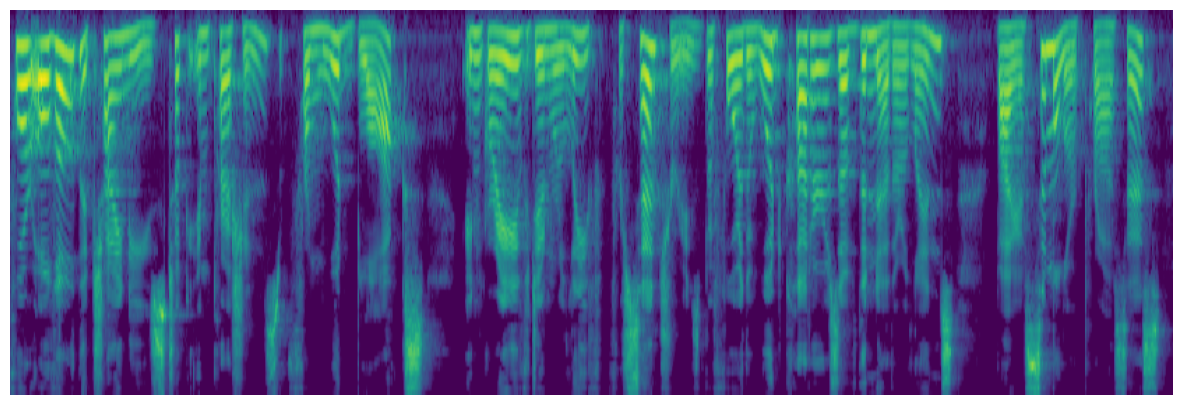

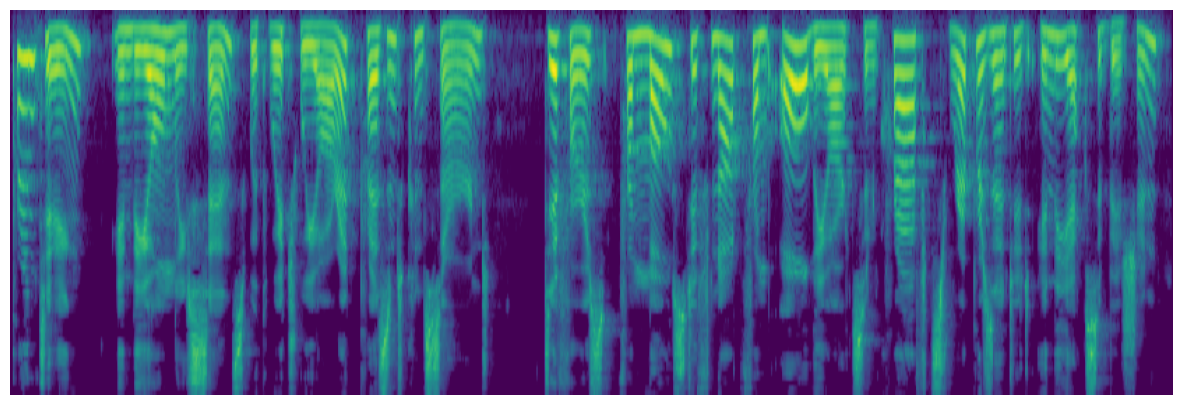

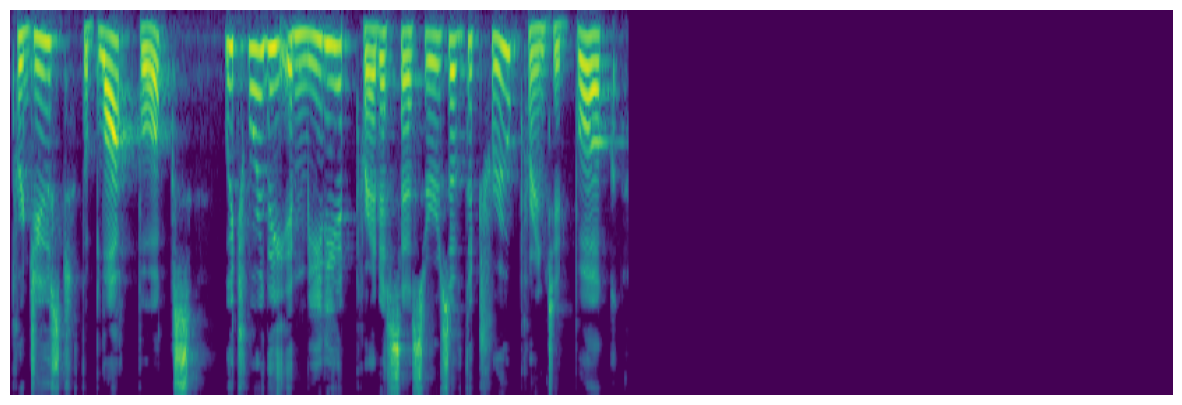

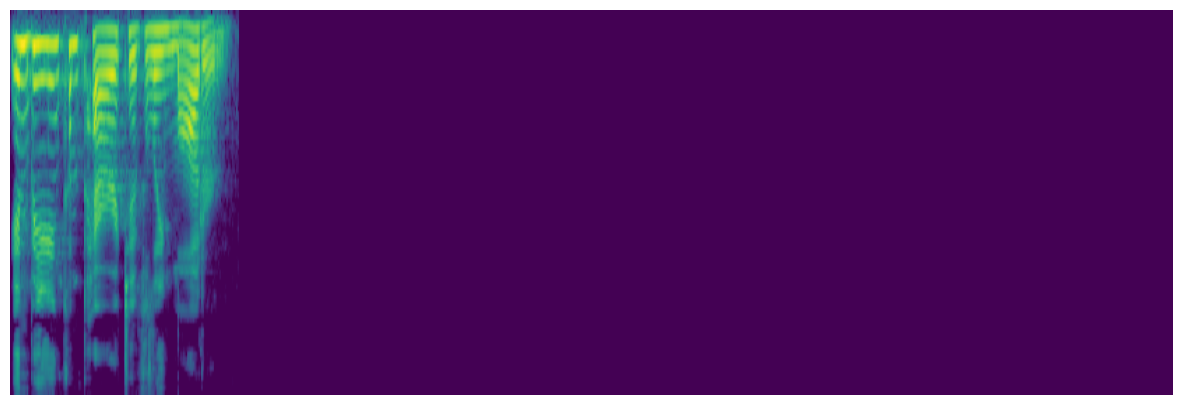

In [7]:
# Confirmation of padding
for data in batch['padded_spectrograms']:
    plt.figure(figsize=(15,5))  
    plt.imshow(data.squeeze(0).numpy(), aspect='auto', origin='lower')
    plt.axis("off")
    plt.gca().invert_yaxis()
    plt.show()